In [89]:
import torch
from pytorch_pretrained_gans import make_gan
import matplotlib.pyplot as plt
import heapq
import numpy as np

# Sample a class-conditional image from BigGAN with default resolution 256



In [90]:
def indices_of_n_largest(ls, n):
    if not ls or n <= 0:
        return []
    largest_n = heapq.nlargest(n, enumerate(ls), key=lambda x: x[1])
    indices = [i for i, v in largest_n]
    return indices

In [91]:
G = make_gan(gan_type='biggan')  # -> nn.Module

Loading BigGAN model biggan-deep-256 from cache at C:\Users\lucas\.pytorch_pretrained_biggan\e7d036ee69a83e83503c46902552573b27d856eaf6b8b84252a63a715dce7501.aec5caf3e5c5252b8857d6bb8adefa8d1d6092a8ba6c9aaed1e6678f8a46be43


In [127]:
y = G.sample_class(batch_size=1)  # -> torch.Size([1, 1000])
z = G.sample_latent(batch_size=1)  # -> torch.Size([1, 128])
x = G(z=z, y=y)  # -> torch.Size([1, 3, 256, 256])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


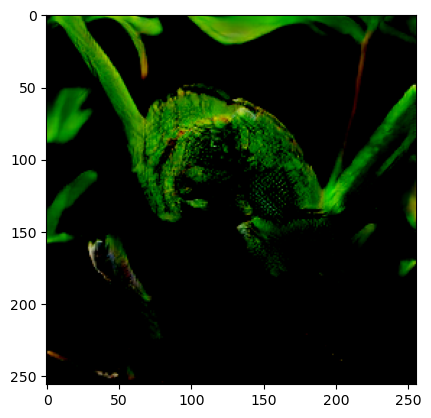

In [128]:
x_img = x[0].detach().cpu().numpy().transpose(1, 2, 0)
plt.imshow(x_img)

In [129]:
G

GeneratorWrapper(
  (G): BigGAN(
    (embeddings): Linear(in_features=1000, out_features=128, bias=False)
    (generator): Generator(
      (gen_z): Linear(in_features=256, out_features=32768, bias=True)
      (layers): ModuleList(
        (0): GenBlock(
          (bn_0): BigGANBatchNorm(
            (scale): Linear(in_features=256, out_features=2048, bias=False)
            (offset): Linear(in_features=256, out_features=2048, bias=False)
          )
          (conv_0): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1))
          (bn_1): BigGANBatchNorm(
            (scale): Linear(in_features=256, out_features=512, bias=False)
            (offset): Linear(in_features=256, out_features=512, bias=False)
          )
          (conv_1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (bn_2): BigGANBatchNorm(
            (scale): Linear(in_features=256, out_features=512, bias=False)
            (offset): Linear(in_features=256, out_features=512, bias=False)


In [138]:
weights = G.G.generator.layers[11].conv_3.weight
weights.shape
#weights[0,0,:,:]

torch.Size([256, 64, 1, 1])

In [131]:
weights_norm = np.zeros((weights.shape[0],weights.shape[1]))
weights_norm_abs = np.zeros((weights.shape[0],weights.shape[1]))
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        v = 0
        v_abs = 0
        t = weights[i,j,:,:].detach().numpy()
        for k in range(t.shape[0]):
            for l in range(t.shape[1]):
                v += (t[k,l])
                v_abs += abs(t[k,l])
        weights_norm[i,j] = v
        weights_norm_abs[i,j] = v_abs

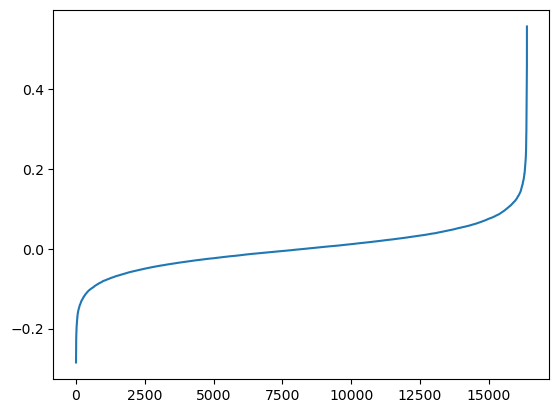

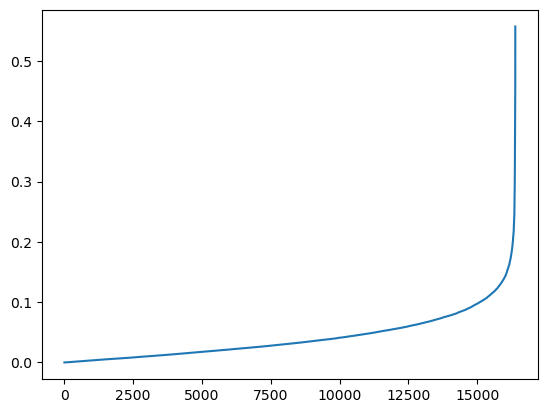

In [132]:
flat_weights = weights_norm.flatten()
flat_weights.sort()
plt.plot(flat_weights)
plt.show()
flat_weights_abs = weights_norm_abs.flatten()
flat_weights_abs.sort()
plt.plot(flat_weights_abs)
plt.show()

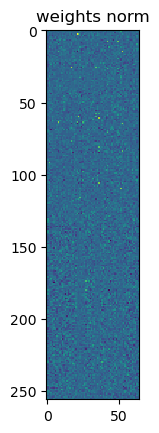

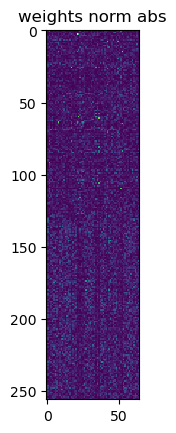

In [133]:

plt.imshow(weights_norm, cmap='viridis', interpolation='none')
plt.title('weights norm')
plt.show()
plt.imshow(weights_norm_abs, cmap='viridis', interpolation='none')
plt.title('weights norm abs')
plt.show()